Basic Reproduction Number (R0): 2.9999999999999996
Peak Infections: 184.03733983608066
Total Infections: 8789.612858283072


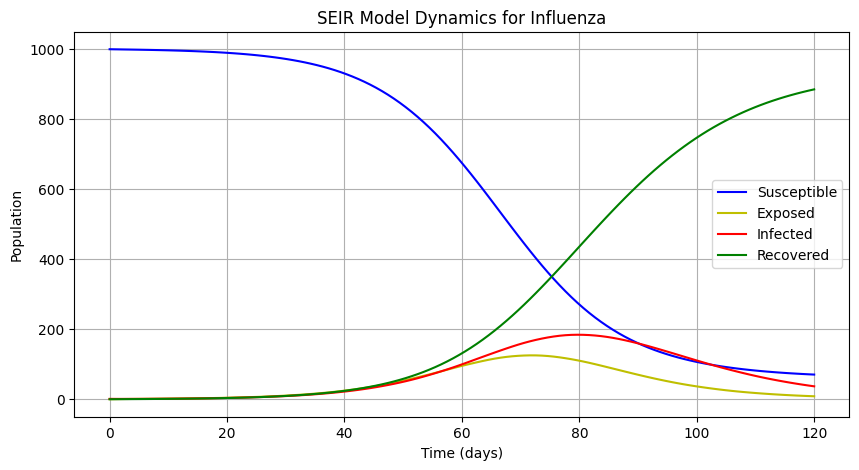

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# PARAMETERS
N = 1000  # Total population
I0 = 1     # Initial number of infected individuals
E0 = 0     # Initial number of exposed individuals
R0 = 0     # Initial number of recovered individuals
S0 = N - I0 - E0 - R0  # Initial number of susceptible individuals

# RATES
beta = 0.3   # Transmission rate
sigma = 1/6   # Incubation rate
gamma = 1/10  # Recovery rate

# TIME POINTS(days)
t = np.linspace(0, 120, 120)

# SEIR MODEL
def deriv(t, y, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * I * S / N
    dEdt = beta * I * S / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# INITIAL CONDITIONS  VECTOR
y0 = S0, E0, I0, R0

# SOLVING THE DIFFERENTIAL EQUATIONS
sol = solve_ivp(deriv, [0, 120], y0, args=(N, beta, sigma, gamma), t_eval=t)

# RESULTS
S, E, I, R = sol.y

# CALCULATING THE BASIC REPRODUCTION NUMBER
R0 = beta / gamma
print(f"Basic Reproduction Number (R0): {R0}")

# PEAK INFECTIONS AND CUMULATIVE INFECTIONS
peak_infections = max(I)
total_infections = sum(I)

print(f"Peak Infections: {peak_infections}")
print(f"Total Infections: {total_infections}")

# PLOTTING THE DATA
plt.figure(figsize=(10, 5))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, E, 'y', label='Exposed')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.title("SEIR Model Dynamics for Influenza")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

